In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# Census Data Products
- Decennial Census of Population and Housing
- American Community Survey (annual) 
- Current Population Survey (monthly) 
- Economic Survey (5 years) 
- Annual Survey of State and Local Government Finances

## Decennial Census of Population and Housing
- Demographics 9age, sex, race, family structure) 
- Housing Occupancy and Onwership (vacant/occupied, rent/own) 
- Group Quarters Population (prison, college dorms) 

## American Community Survey 
- Educational Attainment
- Commuting (mode, time leaving, time travelled) 
- Disability Status 

Data is released in `Subject Tables` such as: 
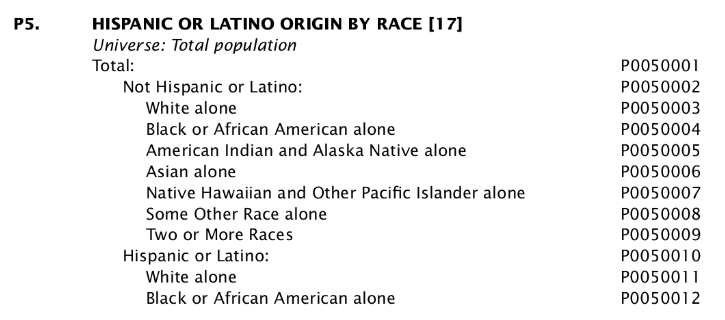



In [2]:
import requests

# Structure of a Census API request 
`https://api.census.gov/data/2010/dec/sfi?get=NAME,p001001,&for=state:*` 
- Base URL 
    - Host = `https://api.census.gov/data`
    - Year = `2010`
    - Dataset = `dec/sf1`
- Parameters 
    - `get` - list of variables 
    - `for` - geography of interest

In [3]:
HOST = "https://api.census.gov/data" 
year = "2010" 
dataset = "dec/sf1" 


base_url = "/".join([HOST, year, dataset])

print(base_url)

https://api.census.gov/data/2010/dec/sf1


In [4]:
predicates = {} 

get_vars = ["NAME", "P001001"]

predicates["get"] = ",".join(get_vars) 
predicates["for"] = "state:*" # request all states

In [5]:
# execute the request
r = requests.get(base_url, params=predicates)

In [6]:
print(r.text)

[["NAME","P001001","state"],
["Alabama","4779736","01"],
["Alaska","710231","02"],
["Arizona","6392017","04"],
["Arkansas","2915918","05"],
["California","37253956","06"],
["Louisiana","4533372","22"],
["Kentucky","4339367","21"],
["Colorado","5029196","08"],
["Connecticut","3574097","09"],
["Delaware","897934","10"],
["District of Columbia","601723","11"],
["Florida","18801310","12"],
["Georgia","9687653","13"],
["Hawaii","1360301","15"],
["Idaho","1567582","16"],
["Illinois","12830632","17"],
["Indiana","6483802","18"],
["Iowa","3046355","19"],
["Kansas","2853118","20"],
["Maine","1328361","23"],
["Maryland","5773552","24"],
["Massachusetts","6547629","25"],
["Michigan","9883640","26"],
["Minnesota","5303925","27"],
["Mississippi","2967297","28"],
["Missouri","5988927","29"],
["Montana","989415","30"],
["Nebraska","1826341","31"],
["Nevada","2700551","32"],
["New Hampshire","1316470","33"],
["New Jersey","8791894","34"],
["New Mexico","2059179","35"],
["New York","19378102","36"],
["

In [7]:
print(r.json()[0])

['NAME', 'P001001', 'state']


In [8]:
col_names = ["name", "tot_pop", "state"] 
df = pd.DataFrame(r.json()[1:], columns=col_names)

In [9]:
print(df.head())

         name   tot_pop state
0     Alabama   4779736    01
1      Alaska    710231    02
2     Arizona   6392017    04
3    Arkansas   2915918    05
4  California  37253956    06


In [10]:
df['tot_pop'] = df['tot_pop'].astype(int)

# Requesting specific geographies

In [11]:
HOST = "https://api.census.gov/data"
year = "2010" 
dataset = "dec/sf1" 
base_url = "/".join([HOST, year, dataset]) 

## Geographic Entities 
state lookup codes: **http://mcdc.missouri.edu/applications/geocodes/**

**Legal/Administrative**
- State
- County 
- Congressional Districts 
- School Districts
**Statistical** 
- Block 
- (Census) Tract 
- Metropolitan/Micropolitan Statistical Area
- ZIP Code Tabulation Area 

In [16]:
predicates = {} 
predicates['get'] = "NAME,P001001" 
predicates['for'] = "state:42" # geocode for pennsylvania

r = requests.get(base_url, params=predicates)

In [17]:
print(r.text)

[["NAME","P001001","state"],
["Pennsylvania","12702379","42"]]


In [19]:
# Demo: request all counties in two states: 
predicates['for'] = "county:*" 
predicates['in'] = "state:33,50"

r = requests.get(base_url, params=predicates) 
print(r.json())

[['NAME', 'P001001', 'state', 'county'], ['Hillsborough County, New Hampshire', '400721', '33', '011'], ['Coos County, New Hampshire', '33055', '33', '007'], ['Grafton County, New Hampshire', '89118', '33', '009'], ['Belknap County, New Hampshire', '60088', '33', '001'], ['Carroll County, New Hampshire', '47818', '33', '003'], ['Cheshire County, New Hampshire', '77117', '33', '005'], ['Sullivan County, New Hampshire', '43742', '33', '019'], ['Merrimack County, New Hampshire', '146445', '33', '013'], ['Rockingham County, New Hampshire', '295223', '33', '015'], ['Strafford County, New Hampshire', '123143', '33', '017'], ['Lamoille County, Vermont', '24475', '50', '015'], ['Addison County, Vermont', '36821', '50', '001'], ['Bennington County, Vermont', '37125', '50', '003'], ['Caledonia County, Vermont', '31227', '50', '005'], ['Chittenden County, Vermont', '156545', '50', '007'], ['Essex County, Vermont', '6306', '50', '009'], ['Franklin County, Vermont', '47746', '50', '011'], ['Grand I

In [21]:
# request specific counties 
predicates["for"] = "county:001,003" 
predicates["in"] = "state:33"

r = requests.get(base_url, params=predicates)

print(r.text)

[["NAME","P001001","state","county"],
["Belknap County, New Hampshire","60088","33","001"],
["Carroll County, New Hampshire","47818","33","003"]]


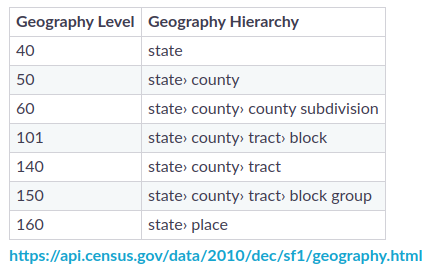

In [22]:
# More complicated part geographies 
predicates= {} 
predicates["get"] = "NAME,P001001" 
predicates["for"] = "county (or part):*"
predicates["in"] = "state:42;congressional district:02"

r = requests.get(base_url, params=predicates)

print(r.text)

[["NAME","P001001","state","congressional district","county (or part)"],
["Montgomery County (part), Congressional District 2 (111th Congress), Pennsylvania","36793","42","02","091"],
["Philadelphia County (part), Congressional District 2 (111th Congress), Pennsylvania","593484","42","02","101"]]


In [29]:
# test: 
predicates = {} 
predicates["get"] = ":*"
predicates["for"] = "county:*"
predicates["in"] = "state:12"

r = requests.get(base_url, params=predicates)
print(r.text)

In [48]:
# Let's try a request using our API key 

predicates = {} 
predicates["key"] = "97d54f0b2bec96ce45749d21afa620949a6cd273"
predicates["get"] = "P001001"
predicates["for"] = "tract" 
predicates["in"] = "state:48;county:*"

r = requests.get(base_url, params=predicates)


names = r.json()[0]
data = r.json()[1:]
print(names)
df = pd.DataFrame(data=data, columns=names)

['P001001', 'state', 'county', 'tract']


In [49]:
df.head()

,P001001,state,county,tract
0,7464,48,141,000101
1,2587,48,141,000111
2,4248,48,141,000205
3,3429,48,141,000208
4,6417,48,141,000301
